# Advection Equation

Here we solve the advection equation $u_t + a u_x=0$ using as an initial condition a gaussian profile $u(x,t=0)=\exp{[-(x-x_0)^2]}$ with $x_0=5$.

We use a domain $x\in [0,10]$ with periodic boundary conditions.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import math
import os

# Define the speed a
a = 1.0

# Define the domain
L = 10.0        # Domain length
nx = 10001        # Number of grid points
dx = L/(nx-1)   # Grid spacing
x = np.linspace(0, L, nx)

# Define the time step and the final time
cf = 0.5
dt = cf*dx/a    # Time step
t_final = 20.0

print('nx=', nx)
print('dx=', dx)
print('dt=', dt)
print('Number of iterations=', t_final/dt)


# Define the initial condition
x0 = 5
u_initial = np.exp(-(x-x0)**2)

# Initialize the solution array
u_current = u_initial.copy()
u_previous = u_initial.copy()

# We create arrays where we will store the time and the l2norm
l2norm = []
l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))

time = []
time.append(0.0)

nx= 10001
dx= 0.001
dt= 0.0005
Number of iterations= 40000.0


In [18]:
# Initilize time and iteration counter
t = 0.0
i = 0

# Save the initial conditions
plt.plot(x, u_current)
plt.title(f'Time={round(t,2):.2f}')
plt.ylim(0, 1.1)
plt.savefig('./images/fig_'+str(i).zfill(5)+'.png', dpi=200)
plt.close()

#solve the advection equation
while t < t_final:
    print(math.ceil(100*t/t_final), "%", end='\r')
    
    # Compute the new solution using various methods
    # Note: np.roll(u_current, -1) is equivalent to u(j+1) and np.roll(u_current,  1) is equivalent to u(j-1)
    # Using np.roll is equivalent to use periodic boundary conditions
    
    # 1) FTCS
    #u_next = u_current - a*dt/(2*dx)*(np.roll(u_current, -1) - np.roll(u_current, 1))
    
    # 2) Lax-Friedrichs
    #u_next = 0.5*(np.roll(u_current, -1) + np.roll(u_current, 1)) - a*dt/(2*dx)*(np.roll(u_current, -1) - np.roll(u_current, 1))    
    
    # 3) Leapfrog (first step with Lax-Friedrichs)
    #if t==0: 
    #    u_next = 0.5*(np.roll(u_current, -1) + np.roll(u_current, 1)) - a*dt/(2*dx)*(np.roll(u_current, -1) - np.roll(u_current, 1))
    #    print('First step with Lax-Friedrichs')
    #else :
    #    u_next = u_previous - (a*dt/dx)*(np.roll(u_current, -1) - np.roll(u_current, 1))
    #    u_previous = u_current.copy() 
    
    # 4) Lax-Wendroff
    u_next = u_current - a*dt/(2*dx)*(np.roll(u_current, -1) - np.roll(u_current, 1)) + (a**2)*(dt**2)/(2*dx**2)*(np.roll(u_current, -1) - 2*u_current + np.roll(u_current, 1))
    
    
    # Update the solution
    u_current = u_next.copy()
    
    # Advance the time 
    t += dt
    i += 1
    
    # Compute the l2 norm and add the time to the time vector
    l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))
    time.append(t)
    
    # Plot the current result and save in an image every t_final/dt/100 iterations
    if (i%(t_final/dt/100)==0):
        plt.plot(x, u_current)
        plt.title(f'Time={round(t,2):.2f}')
        plt.ylim(0,1.1)
        plt.savefig('./images/fig_'+str(i).zfill(6)+'.png', dpi=200)
        plt.close()

In [19]:
#np.save('./results/FTCS_u'+str(nx-1)+'.npy', u_current)
#np.save('./results/FTCS_l2norm'+str(nx-1)+'.npy', l2norm)
#np.save('./results/LaxFriedrichs_u'+str(nx-1)+'.npy', u_current)
#np.save('./results/LaxFriedrichs_l2norm'+str(nx-1)+'.npy', l2norm)
#np.save('./results/Leapfrog_u'+str(nx-1)+'.npy', u_current)
#np.save('./results/Leapfrog_l2norm'+str(nx-1)+'.npy', l2norm)
#np.save('./results/LaxWendroff_u'+str(nx-1)+'.npy', u_current)
#np.save('./results/LaxWendroff_l2norm'+str(nx-1)+'.npy', l2norm)

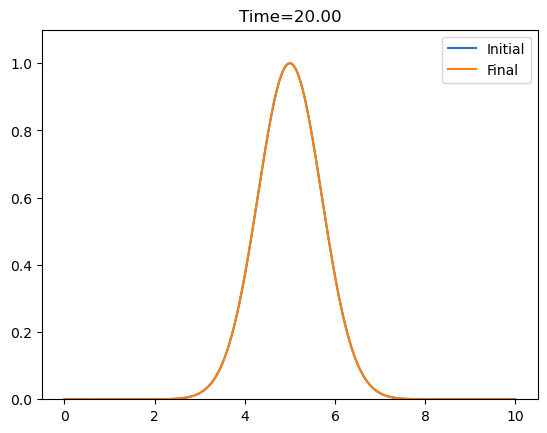

In [20]:
# Plot the final solution
plt.plot(x, u_initial, label='Initial')
plt.plot(x, u_current, label='Final')
plt.title(f'Time={round(t,2):.2f}')
plt.ylim(0, 1.1)
plt.legend()
plt.show()

In [21]:
# Set the directory where your images are stored
directory = "./images/"

# Get the list of image files in the directory
files = os.listdir(directory)

# Sort the files in alphanumeric order
files = sorted(files)

print(files)

import imageio
#with imageio.get_writer('./images/movie.mp4', mode='I', quality=10) as writer:
#    for file in files:
#        image = imageio.imread('./images/'+file)
#        writer.append_data(image)

['fig_00000.png', 'fig_000400.png', 'fig_000800.png', 'fig_001200.png', 'fig_001600.png', 'fig_002000.png', 'fig_002400.png', 'fig_002800.png', 'fig_003200.png', 'fig_003600.png', 'fig_004000.png', 'fig_004400.png', 'fig_004800.png', 'fig_005200.png', 'fig_005600.png', 'fig_006000.png', 'fig_006400.png', 'fig_006800.png', 'fig_007200.png', 'fig_007600.png', 'fig_008000.png', 'fig_008400.png', 'fig_008800.png', 'fig_009200.png', 'fig_009600.png', 'fig_010000.png', 'fig_010400.png', 'fig_010800.png', 'fig_011200.png', 'fig_011600.png', 'fig_012000.png', 'fig_012400.png', 'fig_012800.png', 'fig_013200.png', 'fig_013600.png', 'fig_014000.png', 'fig_014400.png', 'fig_014800.png', 'fig_015200.png', 'fig_015600.png', 'fig_016000.png', 'fig_016400.png', 'fig_016800.png', 'fig_017200.png', 'fig_017600.png', 'fig_018000.png', 'fig_018400.png', 'fig_018800.png', 'fig_019200.png', 'fig_019600.png', 'fig_020000.png', 'fig_020400.png', 'fig_020800.png', 'fig_021200.png', 'fig_021600.png', 'fig_02200

In [22]:
# Don't worry about the code in this cell, it is just to let you display the movies you generated above in Jupyter notebook
#from IPython.display import HTML
#
#HTML("""
#<div align="middle">
#<video width="80%" controls>
#      <source src="./images/movie.mp4" type="video/mp4">
#</video></div>""")

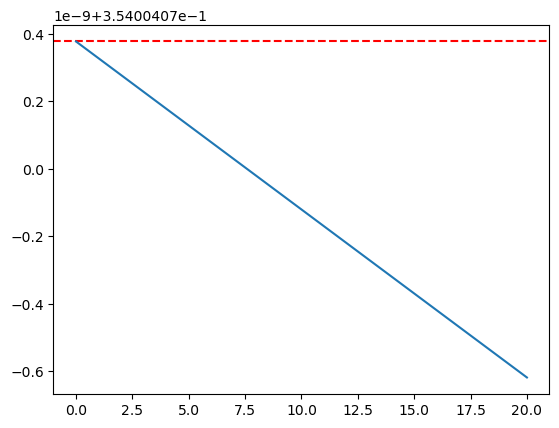

In [23]:
# Compare with data stored
#l2_saved=np.genfromtxt('./l2norm_FTCS.dat', comments='#')
#l2_saved=np.genfromtxt('./l2norm_LAX.dat', comments='#')
#l2_saved=np.genfromtxt('./l2norm_LEAPFROG.dat', comments='#')
#l2_saved=np.genfromtxt('./l2norm_LAXWENDROFF.dat', comments='#')
plt.plot(time, l2norm)
plt.axhline(l2norm[0], ls='--', color='red', zorder=0)
#plt.plot(l2_saved[:,0], l2_saved[:,1], '+')
#plt.savefig('./images/l2norm.png', dpi=200)
plt.show()